In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text, ax_text
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')
df.replace(' ', None, inplace=True)
df = df[[
   'Life Exectancy',
   'Country',
   'Region',
   'Per Capita GDP',
   'Population (millions)',
   'Total Ecological Footprint (Consumption)',
   'Total biocapacity ',
   'Ecological (Deficit) or Reserve',
   'Number of Earths required'
]]
df.columns = [
   'lifexp',
   'country',
   'region',
   'gdpCapita',
   'populationMillions',
   'footprint',
   'biocapacity',
   'ecoReserve',
   'earthsRequired'
]
df['gdpCapita'] = df['gdpCapita'].str.replace('$', '').str.replace(',', '').astype(float)
df['populationMillions'] = df['populationMillions'].str.replace(',', '').astype(float)
df['lifexp'] = df['lifexp'].astype(float)
df['biocapacity'] = df['biocapacity'].astype(float)
df = df[df['biocapacity'] >= 1]

print(df.shape)
df.to_csv('data_cleaned.csv', index=False)
df.head()

(114, 9)


,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired
1,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485
3,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029
5,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556
7,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307
8,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721


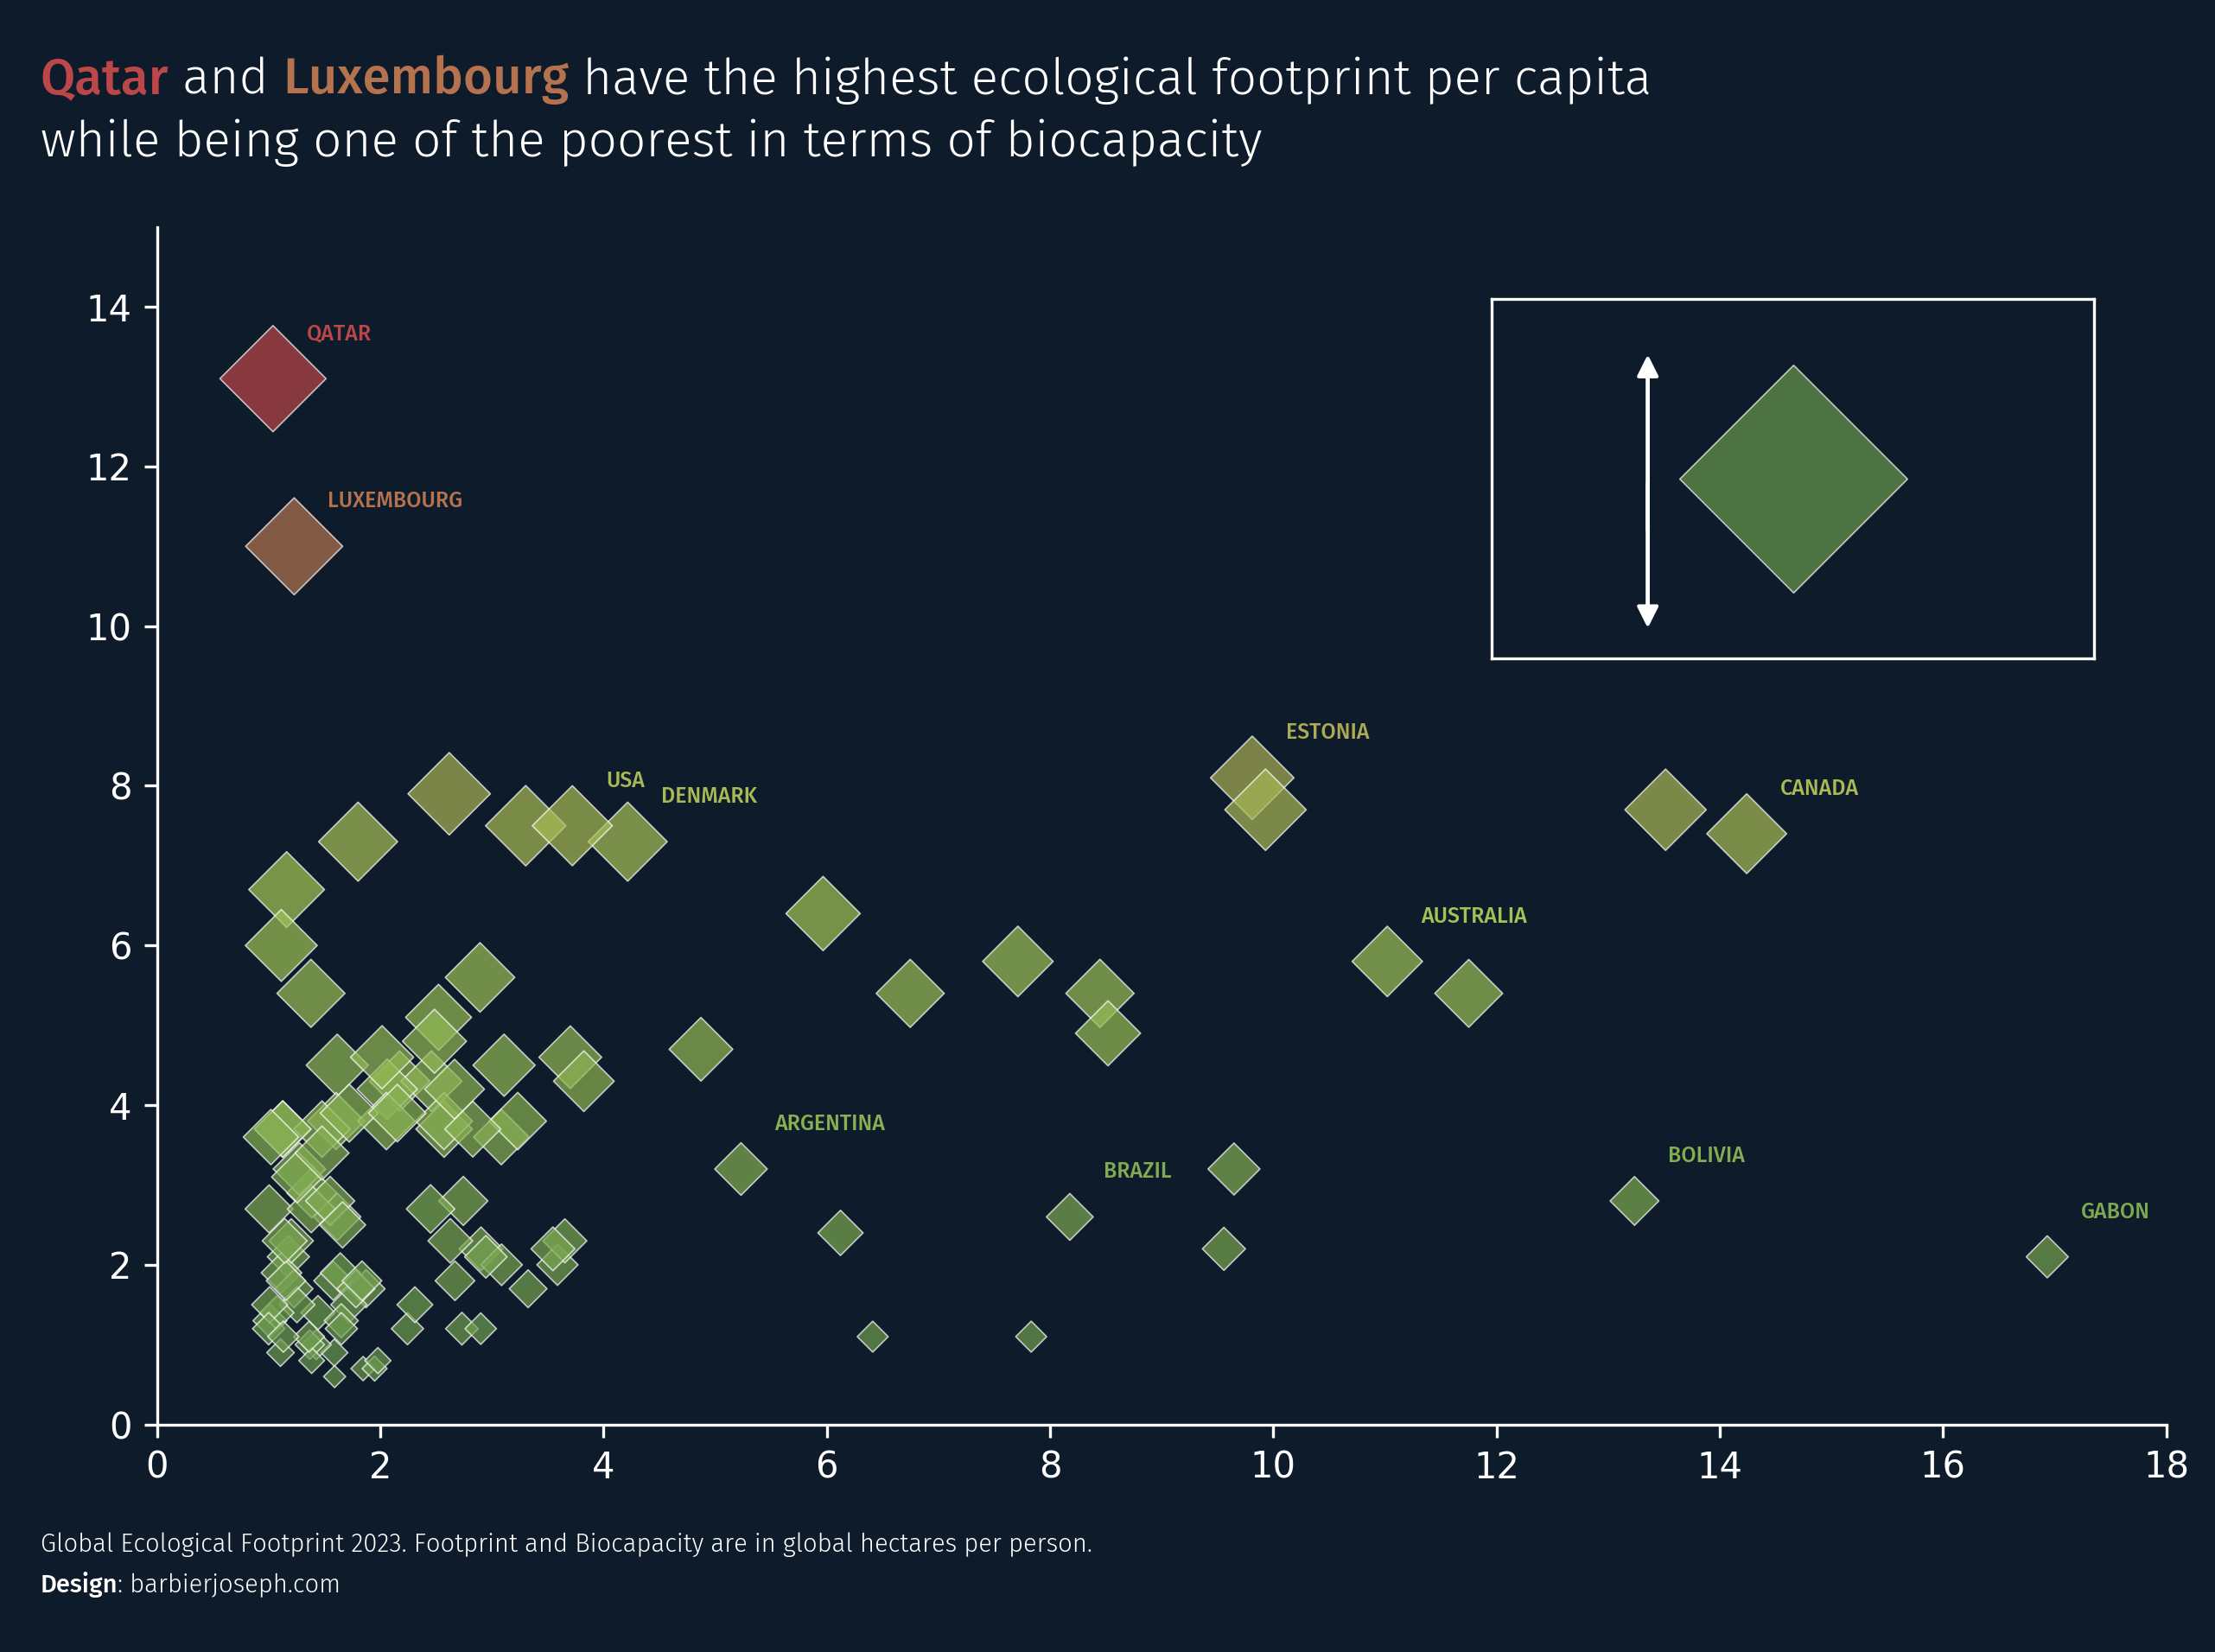

In [200]:
data = df.copy()
data = data[data['biocapacity']< 60]

def create_gradient_colormap(colors):
   cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
   return cmap
def draw_arrow(
   fig, tail_position, head_position,
   color='black', lw=1, radius=0.1, tail_width=0.01,
   head_width=5, head_length=5, invert=False,
   **kwargs):
   arrow_style = f"Simple, tail_width={tail_width}, head_width={head_width}, head_length={head_length}"
   connection_style = f"arc3,rad={'-' if invert else ''}{radius}"
   arrow_patch = FancyArrowPatch(
      tail_position,
      head_position,
      connectionstyle=connection_style,
      transform=fig.transFigure,
      arrowstyle=arrow_style,
      color=color,
      lw=lw,
      **kwargs,
   )
   fig.patches.append(arrow_patch)

# parameters
colors = ['#6a994e', '#a7c957', '#bc4749']
cmap = create_gradient_colormap(colors)
background_color = '#0d1b2a'
text_color = 'white'
countries_to_annote = [
   'Australia', 'Bolivia', 'Canada',
   'Gabon', 'Brazil', 'Argentina',
   'Estonia', 'Luxembourg', 'Qatar',
   'United States of America', 'Denmark',
]
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'
s = 'earthsRequired'

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(text_color)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
ax.set_xlim(0, 18)
ax.set_ylim(0, 15)

scatter = ax.scatter(
   data[x_col],
   data[y_col],
   c=data[c],
   s=data[s]*50,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='D',
   linewidth=0.4
)

for country in countries_to_annote:
   x = data.loc[data['country'] == country, x_col].values[0]
   y = data.loc[data['country'] == country, y_col].values[0]
   color = cmap(data.loc[data['country'] == country, c].values[0]/data[c].max())
   if country == 'United States of America':
      country = 'USA'
   ax_text(
      x+0.3,
      y+0.7,
      country.upper(),
      fontsize=6,
      font=bold_font,
      color=color,
      ha='left',
      va='top',
      ax=ax
   )

# title
qatar_color = cmap(data.loc[data['country'] == 'Qatar', c].values[0]/data[c].max())
luxembourg_color = cmap(data.loc[data['country'] == 'Luxembourg', c].values[0]/data[c].max())
text = """
<Qatar> and <Luxembourg> have the highest ecological footprint per capita
while being one of the poorest in terms of biocapacity
"""
fig_text(
   0.08,
   1,
   text,
   fontsize=14,
   color=text_color,
   font=font,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font, 'color':qatar_color},
      {'font':bold_font, 'color':luxembourg_color}
   ],
   ax=ax
)

# credit and about
text = """
Global Ecological Footprint 2023. Footprint and Biocapacity are in global hectares per person.
<Design>: barbierjoseph.com
"""
fig_text(
   0.08,
   0.05,
   text,
   fontsize=7,
   font=font,
   color=text_color,
   ha='left',
   va='top',
   highlight_textprops=[
      {'font':bold_font}
   ],
   ax=ax
)

# legend
subax = inset_axes(
   parent_axes=ax,
   width="30%",
   height="30%",
   loc=1,
   borderpad=2
)
# plot qatar only
qatar = data[data['country'] == 'Qatar']
subax.scatter(
   qatar[x_col],
   qatar[y_col],
   c=qatar[c],
   s=2000,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='D',
   linewidth=0.4
)
subax.patch.set_alpha(0)
subax.spines[['bottom', 'left', 'top', 'right']].set_color(text_color)
subax.set_xticks([])
subax.set_yticks([])

# arrow in the legend
draw_arrow(fig, (0.7, 0.68), (0.7, 0.8), color='white', radius=0)
draw_arrow(fig, (0.7, 0.72), (0.7, 0.62), color='white', radius=0)

#plt.tight_layout()
plt.savefig('scatterplot.png', bbox_inches='tight', dpi=300)
plt.show()

In [117]:
data[(data[y_col] > 8)][['country', x_col, y_col]].country.values
#data[(data[y_col] >6)][['country', x_col, y_col]]
#data[(data[x_col] > 60) & (data[x_col] < 20000)][['country', x_col, y_col]]

array(['Estonia', 'Luxembourg', 'Qatar'], dtype=object)